In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [20]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [21]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [22]:
df_airline.drop(144, axis=0, inplace=True)
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [23]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [25]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [26]:
df_airline.info() # converted into object to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [27]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [28]:
df_airline.set_index('Month', inplace=True)  # Month column goes into index column
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

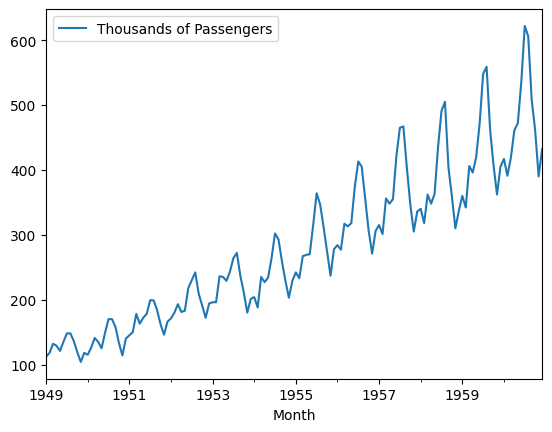

In [29]:
df_airline.plot()

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
# here we want two values ADF statis and p- value
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics: {}'. format(result[0]))
  print('p- value: {}'. format(result[1]))
  if result[1] <= 0.05:
    print('strong evidence against the null hypthesis, reject the null hypothesis. Data has no unit root and is stationary')
  else:
    print('weak evidence against the null hypthesis, time series has a unit root, indicating it is non-stationary')

In [32]:
adf_test(df_airline['Thousands of Passengers']) # the statonary at all

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against the null hypthesis, time series has a unit root, indicating it is non-stationary


In [33]:
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)  # differencing of one day

In [34]:
df_airline.head() # 112.0+6.0 = 118.0, 118.0+14.0 = 132.0, 132.0-3.0=129.0

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [36]:
adf_test(df_airline['Passengers First Difference'].dropna()) # null hypothesis test is rejected for last column, we have to stationary

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against the null hypthesis, time series has a unit root, indicating it is non-stationary


In [37]:
df_airline['Passengers Second Difference'] = df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)  # second differencing

In [38]:
adf_test(df_airline['Passengers Second Difference'].dropna()) # now it is stationary

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypthesis, reject the null hypothesis. Data has no unit root and is stationary


In [39]:
# above we done two seasonal times
# 12 months we need to do, beacuse it is seasonal dataset,
df_airline['Passengers 12 Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [40]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypthesis, reject the null hypothesis. Data has no unit root and is stationary


In [42]:
# P- value determine (pacf), auto corelation (acf)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

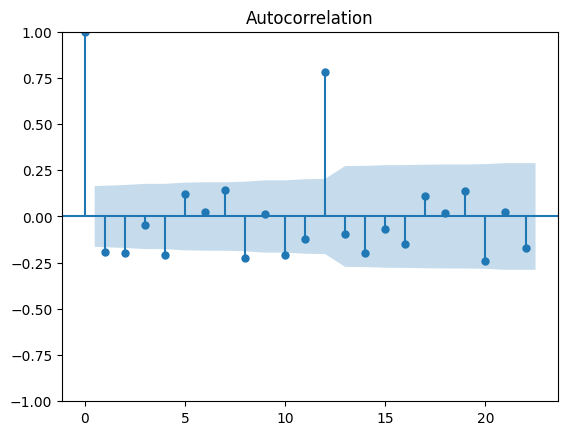

In [43]:
# suppose I try to plot for second difference
acf = plot_acf(df_airline['Passengers Second Difference'].dropna()) # Auto corelation plot

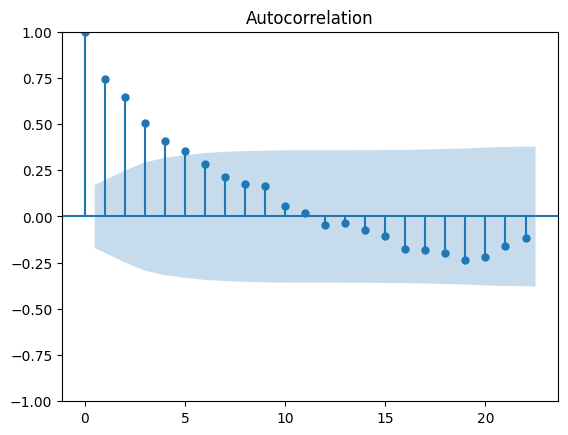

In [44]:
acf12 = plot_acf(df_airline['Passengers 12 Difference'].dropna()) # under the blue colour box having some values the values are not that much impact

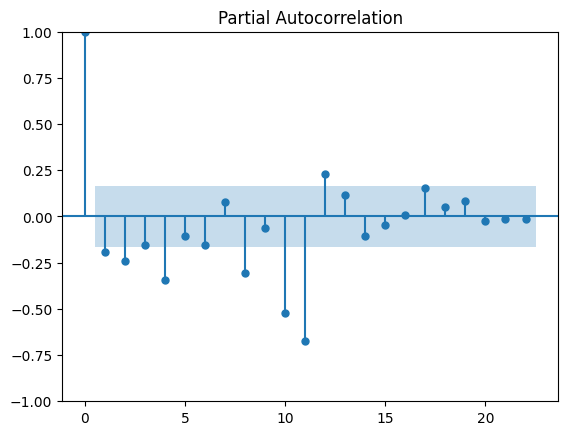

In [48]:
result = plot_pacf(df_airline['Passengers Second Difference'].dropna())

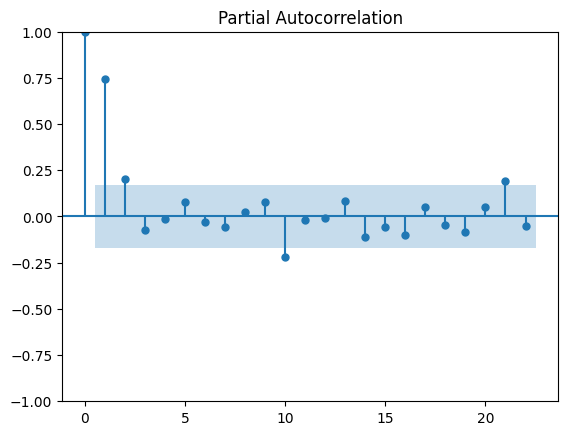

In [47]:
pacf12 = plot_pacf(df_airline['Passengers 12 Difference'].dropna())

In [50]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [51]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [52]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [53]:
#Prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [54]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [59]:
# create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [56]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [63]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10, 2, 0)) # 10 is P- value, 2 is d value, 12 is q value # 0 value for ARIMA, 12 is for SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [64]:
model_ARIMA_fit = model_ARIMA.fit()

In [65]:
model_ARIMA_fit.summary() # here all are P value <0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Tue, 12 Mar 2024   AIC                            736.477
Time:                             06:45:43   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [67]:
pred=model_ARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [68]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478355
1956-03-01      0.556985
1956-04-01      5.172456
1956-05-01     -0.544234
1956-06-01     25.077917
1956-07-01     46.979713
1956-08-01     58.432466
1956-09-01     22.879031
1956-10-01     -1.734755
1956-11-01    -40.623912
1956-12-01    -33.828197
1957-01-01    -34.840405
1957-02-01    -55.098234
1957-03-01      5.312171
1957-04-01     -2.080465
1957-05-01     -6.157694
1957-06-01     40.783483
1957-07-01     82.680626
1957-08-01     94.147419
1957-09-01     39.889902
1957-10-01     -9.108926
1957-11-01    -66.293791
1957-12-01    -49.323597
1958-01-01    -52.077839
1958-02-01    -73.405852
1958-03-01    -26.404583
1958-04-01    -43.572859
1958-05-01    -39.448082
1958-06-01     21.744314
1958-07-01     80.146583
1958-08-01     97.329454
1958-09-01      1.513662
1958-10-01    -47.089150
1958-11-01   -108.125316
1958-12-01    -89.012377
1959-01-01    -69.205584
1959-02-01    -85.352235
1959-03-01    -22.150992
1959-04-01    -36.7

<Axes: ylabel='Density'>

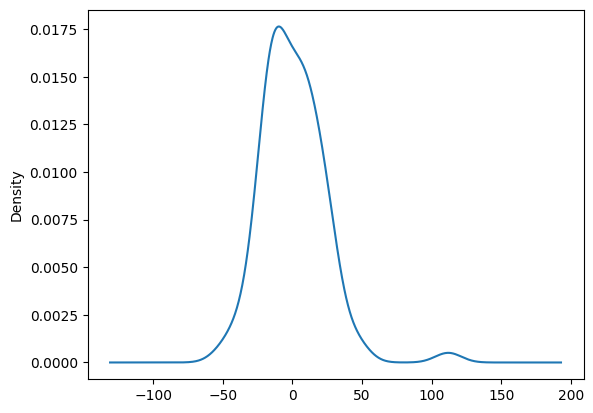

In [69]:
model_ARIMA_fit.resid.plot(kind='kde')

In [70]:
test_data['Predicted_ARIMA']=pred

<ipython-input-70-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

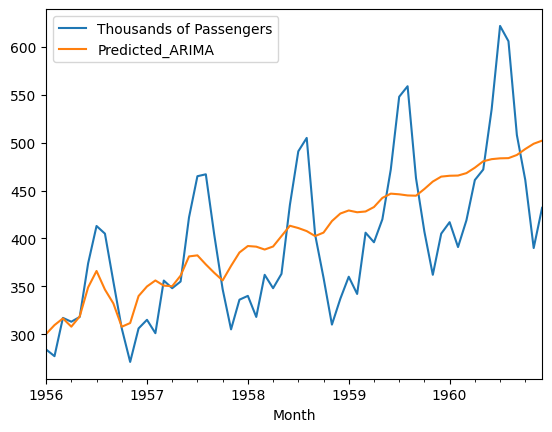

In [71]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

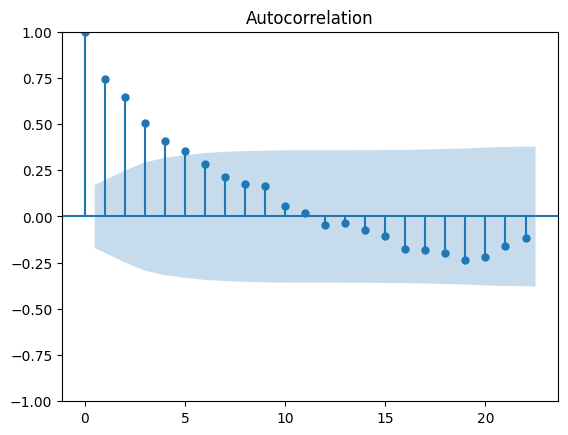

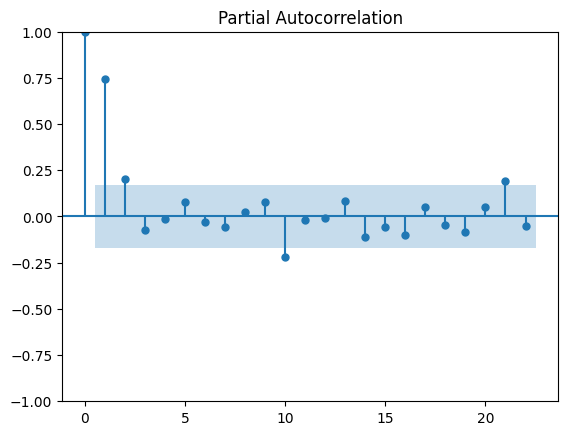

In [72]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [73]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 12 Mar 2024   AIC                            548.481
Time:                                     07:19:14   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883987
1960-09-01,508.0,-98.0,-82.0,45.0,487.184110
1960-10-01,461.0,-47.0,51.0,54.0,493.432791
1960-11-01,390.0,-71.0,-24.0,28.0,498.930080
1960-12-01,432.0,42.0,113.0,27.0,502.159832


In [78]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [79]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

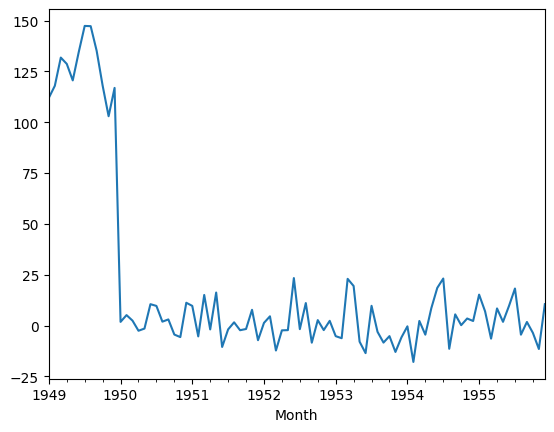

In [80]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

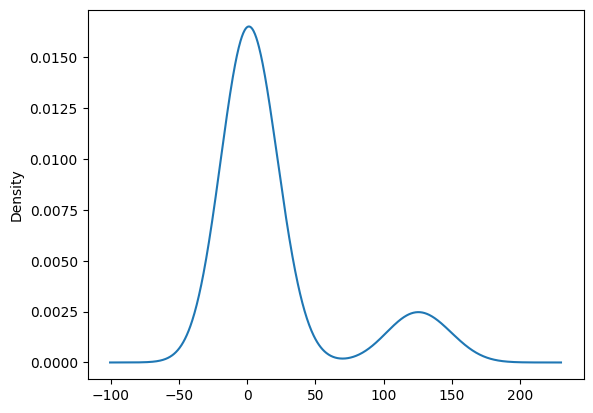

In [81]:
model_SARIMA_fit.resid.plot(kind='kde')

In [82]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-82-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [83]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478355,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443015,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827544,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544234,NaN
1956-06-01,374.0,56.0,51.0,59.0,348.922083,NaN
1956-07-01,413.0,39.0,-17.0,49.0,366.020287,403.397562
1956-08-01,405.0,-8.0,-47.0,58.0,346.567534,385.070585
1956-09-01,355.0,-50.0,-42.0,43.0,332.120969,349.445081


<Axes: xlabel='Month'>

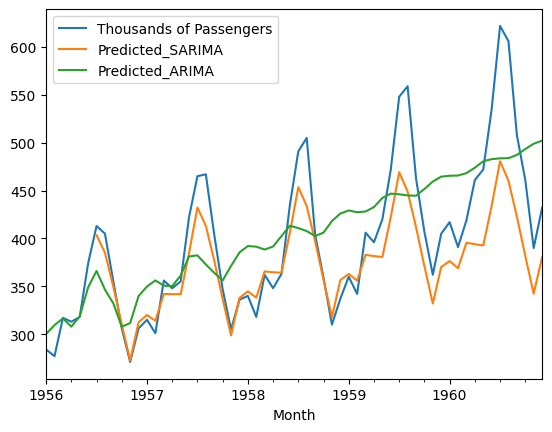

In [84]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()